# Mother Jones Mass Shooting Data Cleaning
### Authors: Joe Acosta
Imports the initial data collected by the mother jones foundation and cleans the data. The data is currently being imported directly from the website and are being cleaned such that future research can expand on their findings.

Mother Jones Initial Data: https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataframe Dictionary
Creates a Data Dictionary that the user can reference locally explaining each column

In [2]:
data_dict = {
    'Column': [
        'case', 'location', 'date', 'summary', 'fatalities', 'injured', 'total_victims',
        'place', 'age_of_shooter', 'prior_signs_mental_health_issues', 'mental_health_details',
        'weapons_obtained_legally', 'where_obtained', 'weapon_type', 'weapon_details',
        'race', 'gender', 'sources', 'mental_health_sources', 'sources_additional_age',
        'latitude', 'longitude', 'type', 'city', 'state', 'where_obtained_category'
    ],
    'DataType': [
        'object', 'object', 'datetime64[ns]', 'object', 'int64', 'int64', 'int64',
        'object', 'object', 'object', 'object',
        'object', 'object', 'object', 'object',
        'object', 'object', 'object', 'object', 'object',
        'object', 'object', 'object', 'object', 'object', 'object'
    ],
    'Description': [
        'Unique case name',
        'City and State incident took place',
        'Incident Date',
        'Summary description of the incident',
        'Number of fatalities in incident',
        'Number of injured victims',
        'Total victims (fatalities + injured)',
        'Specific place or venue of incident',
        'Age of the shooter',
        'Shooter mental health record prior to',
        'Details regarding mental health status',
        'Whether weapons were legally obtained',
        'Where weapons were obtained',
        'Type(s) of weapons used',
        'Additional details about weapons',
        'Race of the shooter',
        'Gender of the shooter',
        'Source references for incident information',
        'Sources related to mental health information',
        'Additional sources or notes regarding age',
        'Latitude coordinate of incident location',
        'Longitude coordinate of incident location',
        'Type/category of incident',
        'City where incident occurred',
        'State where incident occurred',
        'Categorized location where weapons were obtained'
    ]
}

data_dictionary = pd.DataFrame(data_dict)

#### Saves Data Dictionary

In [3]:
data_dictionary.to_csv('../Data/data_dict.csv', index=False)

In [4]:
data_dictionary = data_dictionary.set_index('Column')
data_dictionary

,DataType,Description
Column,,
case,object,Unique case name
location,object,City and State incident took place
date,datetime64[ns],Incident Date
summary,object,Summary description of the incident
fatalities,int64,Number of fatalities in incident
injured,int64,Number of injured victims
total_victims,int64,Total victims (fatalities + injured)
place,object,Specific place or venue of incident
age_of_shooter,object,Age of the shooter


## Initial Data Import
Creates a Pandas DataFrame given the link to the initial data.
Verifies the data types and corrects any discrepencies.

In [5]:
mj_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQBEbQoWMn_P81DuwmlQC0_jr2sJDzkkC0mvF6WLcM53ZYXi8RMfUlunvP1B5W0jRrJvH-wc-WGjDB1/pub?gid=0&single=true&output=csv'
mjms_df = pd.read_csv(mj_url)

In [6]:
mjms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              151 non-null    object
 1   location                          151 non-null    object
 2   date                              151 non-null    object
 3   summary                           151 non-null    object
 4   fatalities                        151 non-null    int64 
 5   injured                           151 non-null    int64 
 6   total_victims                     151 non-null    int64 
 7   location.1                        151 non-null    object
 8   age_of_shooter                    151 non-null    object
 9   prior_signs_mental_health_issues  151 non-null    object
 10  mental_health_details             151 non-null    object
 11  weapons_obtained_legally          151 non-null    object
 12  where_obtained        

## Data Cleaning

### Date Data Cleaning
There are various formats for the year and there exists a seperate column year. Updates the date format such that it's in mm-dd-yyyy format then drops the year column. Also converts the date to datetime64[ns] type allowing for various date related opperations including sorting by year, month, day, decade, etc.

In [7]:
def update_year(date, year) :
    '''
    Updates the date ensuring it's in mm/dd/yyyy format

    Parameters:
     - date (String): date in mm/dd/yy or mm/dd/yyyy
     - year (String): year in yyyy format

    Return:
     - _date (String): date in the format mm/dd/yyyy
    
    // Include into the doc created
    '''
    _month_day = '/'.join(date.split('/')[:2])
    _date = _month_day + '/' + year
    return _date

In [8]:
# Converts date to mm-dd-yyyy using year column
mjms_df.date = mjms_df.apply(lambda row: update_year(row.date, str(row.year)), axis=1)

# Converts date series to pd date type
mjms_df.date = pd.to_datetime(mjms_df.date)

# Drops the year column
mjms_df = mjms_df.drop('year', axis=1)

In [9]:
# Verifies year can get extracted from the date col
mjms_df.date.sample(3).dt.year

48     2018
17     2022
120    1999
Name: date, dtype: int32

### Fatalities Data Cleaning
Calculates the total_victims field given the fatalities and injuries fields. The original data ins't a calculated field. This solution prevents human error in the total_victims field so long as the fatalities and injuries fields are accurate.

In [10]:
mjms_df.total_victims = mjms_df.fatalities + mjms_df.injured

### Age of Shooter Data Cleaning
Cleans the age of shooter. For those cases where there were multiple shooters, the average is taken

#### Verifying Missing Data
Checking for the missing ages that prevent the data from being stored as an int

In [11]:
for i in mjms_df.age_of_shooter.unique() :
    print(i, end=', ')

14, 44, 67, 40, 21, 59, 18, 33, 25, 28, 43, 72, 31, 22, 15, 20, 70, 23, 45, -, 57, 19, 51, 36, 24, 32, 46, 26, 54, 29, 38, 17, 47, 37, 64, 39, 27, 34, 42, 41, 52, 16, 48, 66, 11, 35, 55, 50, 

#### Converts Data to Numeric
Replaces all missing values with -1 then converts the Series to numeric (int)

In [12]:
# Replaces missing ages with -1 then converts the column to integer
mjms_df.age_of_shooter = mjms_df.age_of_shooter.replace('-', -1)
mjms_df.age_of_shooter = pd.to_numeric(mjms_df.age_of_shooter)

In [13]:
pd.set_option('display.max_colwidth', None)

#### Identify Data Cases
For the data that's missing or wrong, returns the case name to use for updating the ages

In [14]:
# Issolate the cases without ages
mjms_df.loc[mjms_df.age_of_shooter == -1, ('case', 'summary', 'age_of_shooter')]

,case,summary,age_of_shooter
25,Sacramento County church shooting,"""A man believed to be meeting his three children for a supervised visit at a church just outside Sacramento on Monday afternoon fatally shot the children and an adult accompanying them before killing himself, police officials said. Sheriff Scott Jones of Sacramento County told reporters at the scene that the gunman had a restraining order against him, and that he had to have supervised visits with his children, who were younger than 15."" (NYTimes)",-1
34,Jersey City kosher market shooting,"David N. Anderson, 47, and Francine Graham, 50, were heavily armed and traveling in a white van when they first killed a police officer in a cemetery, and then opened fire at a kosher market, “fueled both by anti-Semitism and anti-law enforcement beliefs,” according to New Jersey authorities. The pair, linked to the antisemitic ideology of the Black Hebrew Israelites extremist group, were killed after a lenghty gun battle with police at the market.",-1


In [15]:
mjms_df.loc[mjms_df.age_of_shooter == 11, ('case', 'summary', 'age_of_shooter')]

,case,summary,age_of_shooter
126,Westside Middle School killings,"Mitchell Scott Johnson, 13, and Andrew Douglas Golden, 11, two juveniles, ambushed students and teachers as they left the school; they were apprehended by police at the scene.",11


#### Supporting documentation
For the 'Sacramento County church shooting' case, source @ https://www.cnn.com/2022/02/28/us/sacramento-church-shooting identified the shooter as 39-year-old David Mora Rojas

In [16]:
# Sets age of shooter for 'Sacramento Country Church Shooting'
mjms_df.loc[mjms_df.case == 'Sacramento County church shooting', 'age_of_shooter'] = 39

#### Fixing Data Input Error
For the 'Westside Middle School killings' case, the shooters ages were 13 and 11. There were two assalents though only one was recorded.
For the 'Jersey City kosher market shooting' case, the shooters ages were 47 and 50. Ref case summary.

In [17]:
# Updates age_of_shooter to allow lists
mjms_df['age_of_shooter'] = mjms_df['age_of_shooter'].astype('object')

# Gets index regardless of future updates
# Updates the instances where there were multiple shooters
mjms_df.at[mjms_df[mjms_df['case'] == 'Jersey City kosher market shooting'].index[0], 'age_of_shooter'] = [47, 50]
mjms_df.at[mjms_df[mjms_df['case'] == 'Westside Middle School killings'].index[0], 'age_of_shooter'] = [11, 13]

#### Verify Age Corrections

In [18]:
mjms_df.loc[mjms_df.case.isin(['Sacramento County church shooting', 'Jersey City kosher market shooting', 'Westside Middle School killings']), ('case', 'summary', 'age_of_shooter')]

,case,summary,age_of_shooter
25,Sacramento County church shooting,"""A man believed to be meeting his three children for a supervised visit at a church just outside Sacramento on Monday afternoon fatally shot the children and an adult accompanying them before killing himself, police officials said. Sheriff Scott Jones of Sacramento County told reporters at the scene that the gunman had a restraining order against him, and that he had to have supervised visits with his children, who were younger than 15."" (NYTimes)",39
34,Jersey City kosher market shooting,"David N. Anderson, 47, and Francine Graham, 50, were heavily armed and traveling in a white van when they first killed a police officer in a cemetery, and then opened fire at a kosher market, “fueled both by anti-Semitism and anti-law enforcement beliefs,” according to New Jersey authorities. The pair, linked to the antisemitic ideology of the Black Hebrew Israelites extremist group, were killed after a lenghty gun battle with police at the market.","[47, 50]"
126,Westside Middle School killings,"Mitchell Scott Johnson, 13, and Andrew Douglas Golden, 11, two juveniles, ambushed students and teachers as they left the school; they were apprehended by police at the scene.","[11, 13]"


In [19]:
pd.reset_option('display.max_colwidth')

### Gender Data Shooter
Normalizes the genderes of the shooters

- M: Male gender 
- F: Female gender
- T->F: Transgender transitioning from male to female
- T->M: Transgender transitioning from female to male
- M/M: Slash used when multiple shooters where each letter represents a shooter
- O: Gender non-conforming including agender, non-binary, bigender, etc.

In [20]:
mjms_df.gender.unique()

array(['M',
       'F ("identifies as transgender" and "Audrey Hale is a biological woman who, on a social media profile, used male pronouns,” according to Nashville Metro PD officials)',
       'Male & Female', 'F', 'Male', 'Female'], dtype=object)

In [21]:
mjms_df.gender = mjms_df.gender.replace('Female', 'F')
mjms_df.gender = mjms_df.gender.replace('Male', 'M')
mjms_df.gender = mjms_df.gender.replace('Male & Female', 'M/F')

#### Cleaning Audrey's case
Identifies Index and updates the case to reflect she is a Transgender Female to Male

In [22]:
mjms_df[mjms_df.gender.str.contains('F ("identifies as transgender', regex=False)]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type
10,Nashville Christian school shooting,"Nashville, Tennessee",2023-03-27,"Audrey Hale, 28, who was a former student at t...",6,6,12,School,28,-,...,"semiautomatic rifle, semiautomatic handgun",-,White,"F (""identifies as transgender"" and ""Audrey Hal...",https://www.tennessean.com/story/news/crime/20...,-,-,-,-,Mass


In [23]:
mjms_df.loc[mjms_df.case == 'Nashville Christian school shooting', 'gender'] = 'T->M'

#### Cleaning 'Westside Middle School killings' case
The gender of both shooters were not reflected. Updates to account for two shooters

In [24]:
mjms_df.loc[mjms_df.case == 'Westside Middle School killings', 'gender'] = 'M/M'

#### Verifying Gender Data Correction

In [25]:
mjms_df.gender.unique()

array(['M', 'T->M', 'M/F', 'F', 'M/M'], dtype=object)

### Race Data Cleaning
Data normalization conducted. Some entries were capitalized while others weren’t. For the missing data, unknown was entered. Race is specific to the person and without public informaiton on the individua, no attempt was made to identify them by their race

In [26]:
mjms_df.race.unique()

array(['White', 'Black', 'Latino', 'Asian', '-', 'Other', 'White ',
       'Native American', 'white', 'black', 'unclear'], dtype=object)

In [27]:
# Converts to lowercase
mjms_df.race = mjms_df.race.str.lower()
# Remove whitespace
mjms_df.race = mjms_df.race.str.strip()
# Updates '-' inputs to unknown
mjms_df.loc[mjms_df.race == '-', 'race'] = 'unknown'
# Updates 'unclear' inputs to unknown
mjms_df.loc[mjms_df.race == 'unclear', 'race'] = 'unknown'


In [28]:
mjms_df.race.unique()

array(['white', 'black', 'latino', 'asian', 'unknown', 'other',
       'native american'], dtype=object)

### Weapon Obtained Legally Data Cleaning
Identifies if the weapon used in the crime was legally obtained or not

- Yes/No
- TBD
- Unknown
- Some

In [29]:
mjms_df.weapons_obtained_legally.unique()

array(['-', 'yes', 'Yes', 'No', 'TBD',
       'Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI',
       'Unknown', '\nYes',
       'Yes ("some of the weapons were purchased legally and some of them may not have been")',
       'Yes '], dtype=object)

In [30]:
# Converts to lowercase
mjms_df.weapons_obtained_legally = mjms_df.weapons_obtained_legally.str.lower()
# Remove whitespace
mjms_df.weapons_obtained_legally = mjms_df.weapons_obtained_legally.str.strip()

#### Attempt to Identify Unknown
An attempt to determine if any of the shooters weapon acquisition status has been verified since the incident

In [31]:
mjms_df.loc[mjms_df.weapons_obtained_legally == 'unknown', ('case', 'summary', 'weapons_obtained_legally')]

,case,summary,weapons_obtained_legally
65,Fresno downtown shooting,"Kori Ali Muhammad, 39, opened fire along a str...",unknown
68,Baton Rouge police shooting,"Gavin Long, 29, a former Marine who served in ...",unknown
74,Planned Parenthood clinic,"Robert Lewis Dear, 57, shot and killed a polic...",unknown
83,Alturas tribal shooting,"Cherie Lash Rhoades, 44, opened fire at the Ce...",unknown
110,Trolley Square shooting,"Sulejman Talović, 18, rampaged through the sh...",unknown
133,Chuck E. Cheese's killings,"Nathan Dunlap, 19, a recently fired Chuck E. C...",unknown


In [32]:
mjms_df.loc[mjms_df.weapons_obtained_legally == '-', ('case', 'summary', 'weapons_obtained_legally')]

,case,summary,weapons_obtained_legally
0,Apalachee High School shooting,"Colt Gray, 14, was apprehended by responding p...",-
1,Arkansas grocery store shooting,"Travis Posey, 44, opened fire in the parking l...",-
2,UNLV shooting,"Anthony Polito, 67, a former university profes...",-
3,Maine bowling alley and bar shootings,"Robert Card, 40, an Army reservist and firearm...",-
5,Orange County biker bar shooting,"John Snowling, 59, a retired sergeant from the...",-
12,Half Moon Bay spree shooting,"Chunli Zhao, 67, suspected of carrying out the...",-
13,LA dance studio mass shooting,"Huu Can Tran, 72, fled the scene in a white va...",-
14,Virginia Walmart shooting,"Andre Bing, 31, who worked as a supervisor at ...",-
15,LGBTQ club shooting,"Anderson L. Aldrich, 22, wore body armor and o...",-
17,Raleigh spree shooting,"Austin Thompson, 15, went on a rampage in the ...",-


#### Supporting documentation
##### 'unknown' cases
For the 'Fresno downtown shooting' case, source @ https://www.fresnobee.com/news/local/crime/article145336334.html determined the weapon was illegally obtained. In 2006, Kori Ali Muhammad was sentenced by Judge Oliver W. Wanger for felony possession of a firearm and cocaine for which he was incarcerated for 110 Mo. The court also revoked his right to posses a firearm upon release

For the 'Baton Rouge police shooting' case, source @ https://www.kansascity.com/news/local/article159145529.html?utm_source=chatgpt.com determined Gavin obtained his weapon legally

For the 'Planned Parenthood clinic' case, source @ https://www.coloradojudicial.gov/sites/default/files/2023-08/Search%20Warrant%2015-2022_Redacted.pdf reflects that the detectives in the matter didn’t inquire about the legality of the weapons used during the assault.

For the 'Trolley Square shooting' case, source @ https://www.deseret.com/2007/3/30/20010193/salt-lake-police-investigating-3-who-owned-gun-before-talovic/ determined that the pistol was illegally obtained and the shotgun was legally obtained

##### '-' cases
For the 'Apalachee High School shooting' case, source @ https://www.cnn.com/2024/09/06/us/colin-gray-georgia-shooting-suspect-father-charges determined that colin gray had legally purchased a gun that he had then illegally given to his son. The weapon will be marked as a legal purchase

For the 'UNLV shooting' case, source @ https://www.ktnv.com/news/unlv-gunman-had-list-of-targets-brought-handgun-11-mags-to-campus?utm_source=chatgpt.com determined the weapon was legally purchase

In [33]:
# Fresno downtown shooting
mjms_df.loc[mjms_df.case == 'Fresno downtown shooting', 'weapons_obtained_legally'] = 'no'
# Baton Rouge police shooting
mjms_df.loc[mjms_df.case == 'Baton Rouge police shooting', 'weapons_obtained_legally'] = 'yes'
# Trolley Square shooting
mjms_df.loc[mjms_df.case == 'Trolley Square shooting', 'weapons_obtained_legally'] = 'some'

#### Verifying Unknown Shootings Data Correction

In [34]:
mjms_df.loc[mjms_df.weapons_obtained_legally == 'unknown', ('case', 'summary', 'weapons_obtained_legally')]

,case,summary,weapons_obtained_legally
74,Planned Parenthood clinic,"Robert Lewis Dear, 57, shot and killed a polic...",unknown
83,Alturas tribal shooting,"Cherie Lash Rhoades, 44, opened fire at the Ce...",unknown
133,Chuck E. Cheese's killings,"Nathan Dunlap, 19, a recently fired Chuck E. C...",unknown


In [35]:
# Apalachee High School shooting
mjms_df.loc[mjms_df.case == 'Apalachee High School shooting', 'weapons_obtained_legally'] = 'yes'
# Arkansas grocery store shooting
mjms_df.loc[mjms_df.case == 'Arkansas grocery store shooting', 'weapons_obtained_legally'] = 'unknown'
#UNLV shooting
mjms_df.loc[mjms_df.case == 'UNLV shooting', 'weapons_obtained_legally'] = 'yes'

In [36]:
mjms_df.loc[mjms_df.weapons_obtained_legally == '-', ('case', 'summary', 'weapons_obtained_legally')]

,case,summary,weapons_obtained_legally
3,Maine bowling alley and bar shootings,"Robert Card, 40, an Army reservist and firearm...",-
5,Orange County biker bar shooting,"John Snowling, 59, a retired sergeant from the...",-
12,Half Moon Bay spree shooting,"Chunli Zhao, 67, suspected of carrying out the...",-
13,LA dance studio mass shooting,"Huu Can Tran, 72, fled the scene in a white va...",-
14,Virginia Walmart shooting,"Andre Bing, 31, who worked as a supervisor at ...",-
15,LGBTQ club shooting,"Anderson L. Aldrich, 22, wore body armor and o...",-
17,Raleigh spree shooting,"Austin Thompson, 15, went on a rampage in the ...",-
21,Concrete company shooting,"Joe Louis Esquivel, 23, shot four coworkers an...",-
25,Sacramento County church shooting,"""A man believed to be meeting his three childr...",-
26,Oxford High School shooting,"Ethan Crumbley, a 15-year-old student at Oxfor...",-


#### Cleaning 'Chattanooga military recruitment center' case
Some of the weapons were legal but not all

In [37]:
mjms_df.loc[mjms_df.weapons_obtained_legally.str.contains('yes ("some of the weapon', regex=False)]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type
77,Chattanooga military recruitment center,"Chattanooga, Tennessee",2015-07-16,"Kuwaiti-born Mohammod Youssuf Abdulazeez, 24, ...",5,2,7,Military,24,Unclear,...,2 assault rifles; semiautomatic handgun\n,"AK-47, AR-15, and 30-round magazines; 9mm handgun",other,M,http://www.reuters.com/article/2015/07/16/us-u...,-,http://www.reuters.com/article/2015/07/16/us-u...,35.047157,-85.311819,Mass


In [38]:
mjms_df.loc[mjms_df.case == 'Chattanooga military recruitment center', 'weapons_obtained_legally'] = 'some'

#### Cleaning 'Texas First Baptist Church massacre' case
Legal issues while enlisted in the Air Force should have barred him from legally obtaining his weapons. Since the Air Force failed to report his criminal history to the FBI, he was allowed to obtain the weapons he used during the crime. Regardless of the administrative error, the weapons themselves were obtained through what otherwise would be construed as a legal route

In [39]:
mjms_df[mjms_df.weapons_obtained_legally.str.contains('kelley passed federal criminal background checks', regex=False)]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type
57,Texas First Baptist Church massacre,"Sutherland Springs, Texas",2017-11-05,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,26,Yes,...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,white,M,https://www.washingtonpost.com/news/morning-mi...,http://www.expressnews.com/news/local/article/...,https://www.washingtonpost.com/news/morning-mi...,29.273282,-98.056488,Mass


In [40]:
mjms_df.loc[ mjms_df.case == 'Texas First Baptist Church massacre', 'weapons_obtained_legally'] = 'yes'

In [41]:
mjms_df.weapons_obtained_legally.unique()

array(['yes', 'unknown', '-', 'no', 'tbd', 'some'], dtype=object)

### Location Data Cleaning
The location for the shootings was given as a single field containing city and state. This was split into two fields. One for city, and the other for state.

In [42]:
# Extracts the city and state from the location field
mjms_df[['city', 'state']] = mjms_df.location.str.split(', ', expand=True)

#### Verify Location Data Cleaning
The DataFrame will retain the original location column incase any issues arised from the extraction of the city and state. 

In [43]:
mjms_df[['case', 'city', 'state', 'location']]

,case,city,state,location
0,Apalachee High School shooting,Winder,Georgia,"Winder, Georgia"
1,Arkansas grocery store shooting,Fordyce,Arkansas,"Fordyce, Arkansas"
2,UNLV shooting,Las Vegas,Nevada,"Las Vegas, Nevada"
3,Maine bowling alley and bar shootings,Lewiston,Maine,"Lewiston, Maine"
4,Jacksonville Dollar General store shooting,Jacksonville,Florida,"Jacksonville, Florida"
...,...,...,...,...
146,Shopping centers spree killings,Palm Bay,Florida,"Palm Bay, Florida"
147,United States Postal Service shooting,Edmond,Oklahoma,"Edmond, Oklahoma"
148,San Ysidro McDonald's massacre,San Ysidro,California,"San Ysidro, California"
149,Dallas nightclub shooting,Dallas,Texas,"Dallas, Texas"


### Place Data Cleaning
The place the shooting occured is the actual environment. The original field is stored as location.1 so the name needs to be changed then the field needs to be cleaned. Options are:

- School
- Workplace
- Other
- Religious
- Military
- Airport

In [44]:
# Fixes field name
mjms_df = mjms_df.rename(columns={'location.1': 'place'})
# Prints unique values
mjms_df.place.unique()

array(['School', 'workplace', 'Other', 'Workplace', 'religious',
       'Religious', 'Military', 'Airport', '\nWorkplace', 'Other\n'],
      dtype=object)

In [45]:
# Converts to lowercase
mjms_df.place = mjms_df.place.str.lower()
# Remove whitespace
mjms_df.place = mjms_df.place.str.strip()

#### Verify Place Correction

In [46]:
mjms_df.place.unique()

array(['school', 'workplace', 'other', 'religious', 'military', 'airport'],
      dtype=object)

### Mental Health Data Cleaning
Cleans the data collected for the shooter’s mental health status prior to the shooting. In this section, unless the details are truly ambiguous, the input will be marked as no. There are several instances where a single traumatic event can be seen as the catalyst. 

In [47]:
mjms_df.prior_signs_mental_health_issues.unique()

array(['yes', '-', 'TBD', 'Yes', 'Unclear', 'Unknown', 'No', 'Unclear '],
      dtype=object)

In [48]:
# Converts to lowercase
mjms_df.prior_signs_mental_health_issues = mjms_df.prior_signs_mental_health_issues.str.lower()
# Remove whitespace
mjms_df.prior_signs_mental_health_issues = mjms_df.prior_signs_mental_health_issues.str.strip()

#### Verify Missing Data
For those fields without data, attempts to find it through new or current sources

In [49]:
mjms_df.loc[ mjms_df.prior_signs_mental_health_issues == '-', ('case', 'summary', 'prior_signs_mental_health_issues') ]

,case,summary,prior_signs_mental_health_issues
1,Arkansas grocery store shooting,"Travis Posey, 44, opened fire in the parking l...",-
2,UNLV shooting,"Anthony Polito, 67, a former university profes...",-
5,Orange County biker bar shooting,"John Snowling, 59, a retired sergeant from the...",-
10,Nashville Christian school shooting,"Audrey Hale, 28, who was a former student at t...",-
11,Michigan State University shooting,"Anthony D. McRae, 43, opened fire at Berkey Ha...",-
12,Half Moon Bay spree shooting,"Chunli Zhao, 67, suspected of carrying out the...",-
14,Virginia Walmart shooting,"Andre Bing, 31, who worked as a supervisor at ...",-
16,University of Virginia shooting,"Christopher Darnell Jones Jr., 22, allegedly o...",-
17,Raleigh spree shooting,"Austin Thompson, 15, went on a rampage in the ...",-
18,Greenwood Park Mall shooting,"Jonathan Sapirman, 20, opened fire in a mall f...",-


#### Verifying Mental Health Status

For the 'Apalachee High School shooting' case, source @ https://www.kark.com/crime/who-is-travis-posey-look-into-the-fordyce-mass-shooting-suspects-background/ references a bankruptcy as the catalyst. Posey had a nonexistent criminal record and no prior indications were noted

For the 'UNLV shooting' case, source @ https://www.nbcnews.com/news/us-news/anthony-polito-was-eccentric-teacher-obsessed-las-vegas-rcna128648 identified the probable cause as general apathy from not being able to find a job

For the 'Orange County biker bar shooting' case, source @ https://www.yahoo.com/news/multiple-wounded-shooting-california-biker-034547907.html identified the probable cause as a divorce court proceeding where communal property disputes resulted in the assailant’s spouse potentially receiving a portion of their pension

For the 'Nashville Christian school shooting' case, source @ https://www.wsmv.com/2023/03/28/nashville-school-shooter-had-mental-disorder-police-say/#:~:text=Metro%20Nashville%20Police%20Chief%20John,shooting%20at%20The%20Covenant%20School.&text=NASHVILLE%2C%20Tenn.,the%20Metro%20Nashville%20Police%20Department. determined the shooter had prior mental health issues and was under care

For the 'Michigan State University shooting' case, source @ https://www.detroitnews.com/story/news/local/michigan/2023/02/14/michigan-state-university-msu-shooter-anthony-mcrae-gun-conviction-with-weapons-history/69901983007/ determined the shooter had prior signs of mental health issues

For the 'Half Moon Bay spree shooting' case, source @ https://www.cbsnews.com/sanfrancisco/news/were-warning-signs-missed-in-two-california-mass-shootings/ determined the shooter was suffering from acute mental health issues as a result of inhumane work conditions

For the 'Virginia Walmart shooting' case, source @ https://www.nbcnews.com/news/us-news/walmart-suspect-andre-bing-was-longtime-employee-was-little-rcna58574 determined the shooter had prior signs of mental health issues. He had claimed that if he got fired he would commit an act of violence showing a general predisposition towards violence. The assailant also had paranoia regarding the government, social media, etc.

For the 'University of Virginia shooting' case, source @ https://www.nytimes.com/2022/11/30/us/shooting-suspect-video-university-virginia.html determined the shooter had prior signs of mental health issues. He had rapped in a video about both murder and his mental health issues and his father claimed he suffered from paranoia

In [50]:
# 'Arkansas grocery store shooting'
mjms_df.loc[mjms_df.case == 'Arkansas grocery store shooting', 'prior_signs_mental_health_issues'] = 'no'

# 'UNLV shooting'
mjms_df.loc[mjms_df.case == 'UNLV shooting', 'prior_signs_mental_health_issues'] = 'no'

# 'Orange County biker bar shooting'
mjms_df.loc[mjms_df.case == 'Orange County biker bar shooting', 'prior_signs_mental_health_issues'] = 'no'

# 'Nashville Christian school shooting'
mjms_df.loc[mjms_df.case == 'Nashville Christian school shooting', 'prior_signs_mental_health_issues'] = 'yes'

# 'Michigan State University shooting'
mjms_df.loc[mjms_df.case == 'Michigan State University shooting', 'prior_signs_mental_health_issues'] = 'yes'

# 'Half Moon Bay spree shooting'
mjms_df.loc[mjms_df.case == 'Half Moon Bay spree shooting', 'prior_signs_mental_health_issues'] = 'yes'

# 'Virginia Walmart shooting'
mjms_df.loc[mjms_df.case == 'Virginia Walmart shooting', 'prior_signs_mental_health_issues'] = 'yes'

# 'University of Virginia shooting'
mjms_df.loc[mjms_df.case == 'University of Virginia shooting', 'prior_signs_mental_health_issues'] = 'yes'

In [51]:
mjms_df.prior_signs_mental_health_issues.unique()

array(['yes', 'no', '-', 'tbd', 'unclear', 'unknown'], dtype=object)

### Cleaning Where Obtained And Creating Where Obtained Category
After analyzing each entry, assigns a category to the case for where the wepon was obtained.

- Gun Store
- Sports
- Issued
- Stolen
- Online
- Individual
- Assembled
- Family
- Pawn
- Other
- Unclear/Unknown

In [52]:
def add_category(obtained, category) :
    '''
    If applicable, adds multiple categories to the obtained category list. Otherwise, assigns the input as a string
         - Param: category (Str): The category that applies to the case
         - Return: list|str: Returns either a list or a str depending on the number of categories
    '''
    if isinstance(obtained, list) :
        return obtained + [category]    
    elif pd.isnull(obtained) :
        return category
    else :
        lst = [obtained]
        lst.append(category)
        return lst

#### Creates the Where Obtained Category and assigns '-' to all 

In [53]:
mjms_df['where_obtained_category'] = None

#### Assings Gun Store Category


In [54]:
gun_store_str = 'gun store|retailer|gun center|gun dealer|gun shop|B&B Gun|Frank\'s Guns|Tilford\'s|Shooting center|Sharpshooters Small|Bull\'s|Bullseye|Guns Galore|Local stores|Big E'

In [55]:
# Checks the number of entries
mjms_df.loc[mjms_df.where_obtained.str.contains(gun_store_str, case=False), ('case', 'where_obtained')]

,case,where_obtained
4,Jacksonville Dollar General store shooting,local gun stores
9,Louisville bank shooting,gun dealership in Louisville
45,Thousand Oaks nightclub shooting,A gun store in Simi Valley
49,Fifth Third Center shooting,A local gun store
60,Las Vegas Strip massacre,Two gun shops in Nevada
70,Orlando nightclub massacre,"Shooting center in Port St. Lucie, Florida"
78,Charleston Church Shooting,"Shooter's Choice gun store in West Columbia, S..."
82,Fort Hood shooting 2,"Local gun store in Killeen, Guns Galore"
84,Washington Navy Yard shooting,Sharpshooters Small Arms Range
85,Hialeah apartment shooting,Florida Gun Center


In [56]:
# Assigns the values
mjms_df.loc[mjms_df.where_obtained.str.contains(gun_store_str, case=False), 'where_obtained_category'] = 'gun store'

#### Assigns Family as Category

In [57]:
# Checks the number of entries
mjms_df.loc[mjms_df.where_obtained.str.contains('family|father|mother', case=False), ('case','where_obtained')]

,case,where_obtained
51,Santa Fe High School shooting,Father's weapons
52,Waffle House shooting,Family member
76,Umpqua Community College shooting,From the home he shared with his mother. All w...
80,Marysville-Pilchuck High School shooting,Gun was his father's.
89,Sandy Hook Elementary massacre,Stolen from mother
107,Westroads Mall shooting,Stolen from grandfather
114,Red Lake massacre,Glock and Remington stolen from grandfather
116,Damageplan show shooting,Received as a gift from mother
125,Thurston High School shooting,"Purchased variously from friend and father, an..."
126,Westside Middle School killings,Stolen from grandfather and father


In [58]:
# Assigns the values
mjms_df.loc[mjms_df.where_obtained.str.contains('family|father|mother', case=False), 'where_obtained_category'] = 'family'

#### Assigns Stolen Category

In [59]:
# Checks the number of entries
mjms_df.loc[mjms_df.where_obtained.str.contains('stole|burglary', case=False), ('case','where_obtained')]

,case,where_obtained
61,San Francisco UPS shooting,Unclear; the firearm was stolen in Utah. A sec...
89,Sandy Hook Elementary massacre,Stolen from mother
100,Coffee shop police killings,Stolen from an individual in Seattle.
106,Kirkwood City Council shooting,Taken in burglary and from fallen police officer
107,Westroads Mall shooting,Stolen from grandfather
114,Red Lake massacre,Glock and Remington stolen from grandfather
125,Thurston High School shooting,"Purchased variously from friend and father, an..."
126,Westside Middle School killings,Stolen from grandfather and father


In [60]:
# Assigns the Values
mjms_df.loc[mjms_df.where_obtained.str.contains('stole|burglary', case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('stole|burglary', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'stolen'))

#### Assigns Unclear Category

In [61]:
unclear_str = 'unclear|unknown|^-|tbd|Yes|United|"greater|in Greenwood|on July 9'

In [62]:
mjms_df.loc[mjms_df.where_obtained.str.contains(unclear_str, case=False), ('case','where_obtained')]

,case,where_obtained
0,Apalachee High School shooting,-
1,Arkansas grocery store shooting,-
2,UNLV shooting,-
3,Maine bowling alley and bar shootings,Yes
5,Orange County biker bar shooting,-
...,...,...
131,Walter Rossler Company massacre,Unknown
133,Chuck E. Cheese's killings,Unknown
135,Luigi's shooting,Unknown
142,GMAC massacre,Unknown


In [63]:
mjms_df.loc[mjms_df.where_obtained.str.contains(unclear_str, case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('unclear|unknown|^-|tbd|Yes|United|"greater|in Greenwood|on July 9', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'unclear/unknown'))

#### Assign Sporting Store

In [64]:
sports_str = 'sport|Gander Mountain|Outdoorsman|Fin & Feather'

In [65]:
mjms_df.loc[mjms_df.where_obtained.str.contains(sports_str, case=False), ('case','where_obtained')]

,case,where_obtained
16,University of Virginia shooting,"Dance's Sporting Goods; Colonial Heights, VA"
57,Texas First Baptist Church massacre,Purchased in April 2016 from an Academy Sports...
92,Aurora theater shooting,"Gander Mountain stores in Thornton and Aurora,..."
98,Tucson shooting,"Sportsmen's Warehouse in Tucson, Ariz."
102,Binghamton shootings,"Gander Mountain in Johnson City, N.Y."
103,Carthage nursing home shooting,Local sporting goods stores and individuals
110,Trolley Square shooting,Purchased variously from Sportsman's Fast Cash...
112,Capitol Hill massacre,"Various sporting goods stores in Kalispell, Mont."
118,Navistar shooting,Some purchased from Pepper Sports in Glen Elly...
134,Long Island Rail Road massacre,"Turner's Outdoorsman in Signal Hill, Calif."


In [66]:
mjms_df.loc[mjms_df.where_obtained.str.contains(sports_str, case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains(sports_str, case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'sport'))

#### Assign Online Category

In [67]:
mjms_df.loc[mjms_df.where_obtained.str.contains('online|internet', case=False), ('case','where_obtained')]

,case,where_obtained
69,Dallas police shooting,online and or gun show
77,Chattanooga military recruitment center,"On the internet, via Armslist.com"
105,Northern Illinois University shooting,"Online and gun retailers in Champaign, Ill."
109,Virginia Tech massacre,Purchased variously online and from Roanoke Fi...


In [68]:
mjms_df.loc[mjms_df.where_obtained.str.contains('online|internet', case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('online|internet', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'online'))

#### Assign Pawn Shop Category

In [69]:
mjms_df.loc[mjms_df.where_obtained.str.contains('pawn', case=False), ('case','where_obtained')]

,case,where_obtained
54,Marjory Stoneman Douglas High School shooting,A Florida pawn shop
113,Goleta postal shootings,"Pawn shops in Grants and Gallup, N.M."
136,101 California Street shootings,"Super Pawn and Pacific Tactical Weapons, both ..."
149,Dallas nightclub shooting,"Hines Boulevard Pawn Shop in Dallas, Texas"


In [70]:
mjms_df.loc[mjms_df.where_obtained.str.contains('pawn', case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('pawn', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'pawn'))

#### Assign Issued Category 

In [71]:
mjms_df.loc[mjms_df.where_obtained.str.contains('issue', case=False), ('case','where_obtained')]

,case,where_obtained
108,Crandon shooting,Issued by Forest County Sheriff's Department
147,United States Postal Service shooting,"Issued by Oklahoma National Guard, where Sherr..."


In [72]:
mjms_df.loc[mjms_df.where_obtained.str.contains('issue', case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('issue', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'issued'))

#### Assign Assembled Category

In [73]:
mjms_df.loc[mjms_df.where_obtained.str.contains('Assembled', case=False), ('case','where_obtained')]

,case,where_obtained
86,Santa Monica rampage,Assembled a rifle out of component parts.


In [74]:
mjms_df.loc[mjms_df.where_obtained.str.contains('Assembled', case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('Assembled', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'assembled'))

#### Assign Individual Category

In [75]:
mjms_df.loc[mjms_df.where_obtained.str.contains('Purchased from an individual', case=False), ('case','where_obtained')]

,case,where_obtained
97,IHOP shooting,Purchased from an individual
117,Lockheed Martin shooting,Purchased from an individual


In [76]:
mjms_df.loc[mjms_df.where_obtained.str.contains('Purchased from an individual', case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains('Purchased from an individual', case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'individual'))

#### Other

In [77]:
other_str = 'Sandy Trading Post in Sandy|Tanner Gun Show|flea market|Hunting Supplies of Hawaii'

In [78]:
mjms_df.loc[mjms_df.where_obtained.str.contains(other_str, case=False), ('case','where_obtained')]

,case,where_obtained
121,Xerox killings,Hunting Supplies of Hawaii (The Armory) in Hon...
122,Wedgwood Baptist Church shooting,"Trader's Village flea market in Grand Prairie,..."
124,Columbine High School massacre,Purchased variously at Tanner Gun Show in Denv...
144,Stockton schoolyard shooting,"Sandy Trading Post in Sandy, Ore.; Hunter Loan..."


In [79]:
mjms_df.loc[mjms_df.where_obtained.str.contains(other_str, case=False), 'where_obtained_category'] = mjms_df.loc[mjms_df.where_obtained.str.contains(other_str, case=False), 'where_obtained_category'].apply( lambda x : add_category(x, 'other'))

#### Verify Obtained Category

In [80]:
mjms_df['where_obtained_category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x).unique()

array(['unclear/unknown', 'gun store', 'sport', 'family', 'pawn',
       'stolen, unclear/unknown', 'online', 'assembled', 'family, stolen',
       'individual', 'stolen', 'gun store, online', 'issued', 'other',
       'gun store, sport'], dtype=object)

### Stores Data as CSV
If the user wants a clean copy of the data, they can store it as a CSV by uncommenting this line and adjusting the file path.

In [86]:
# mjms_df.to_csv('../Data/clead_mjms_data.csv', index=False)

## Examples With Clean Data
Shows the benefit of cleaning data

In [82]:
# Sorts Shootings by state and returns the top 5 states by number of shootings
mjms_df.state.value_counts().head(5)

state
California    26
Florida       13
Texas         13
Colorado       8
Washington     7
Name: count, dtype: int64

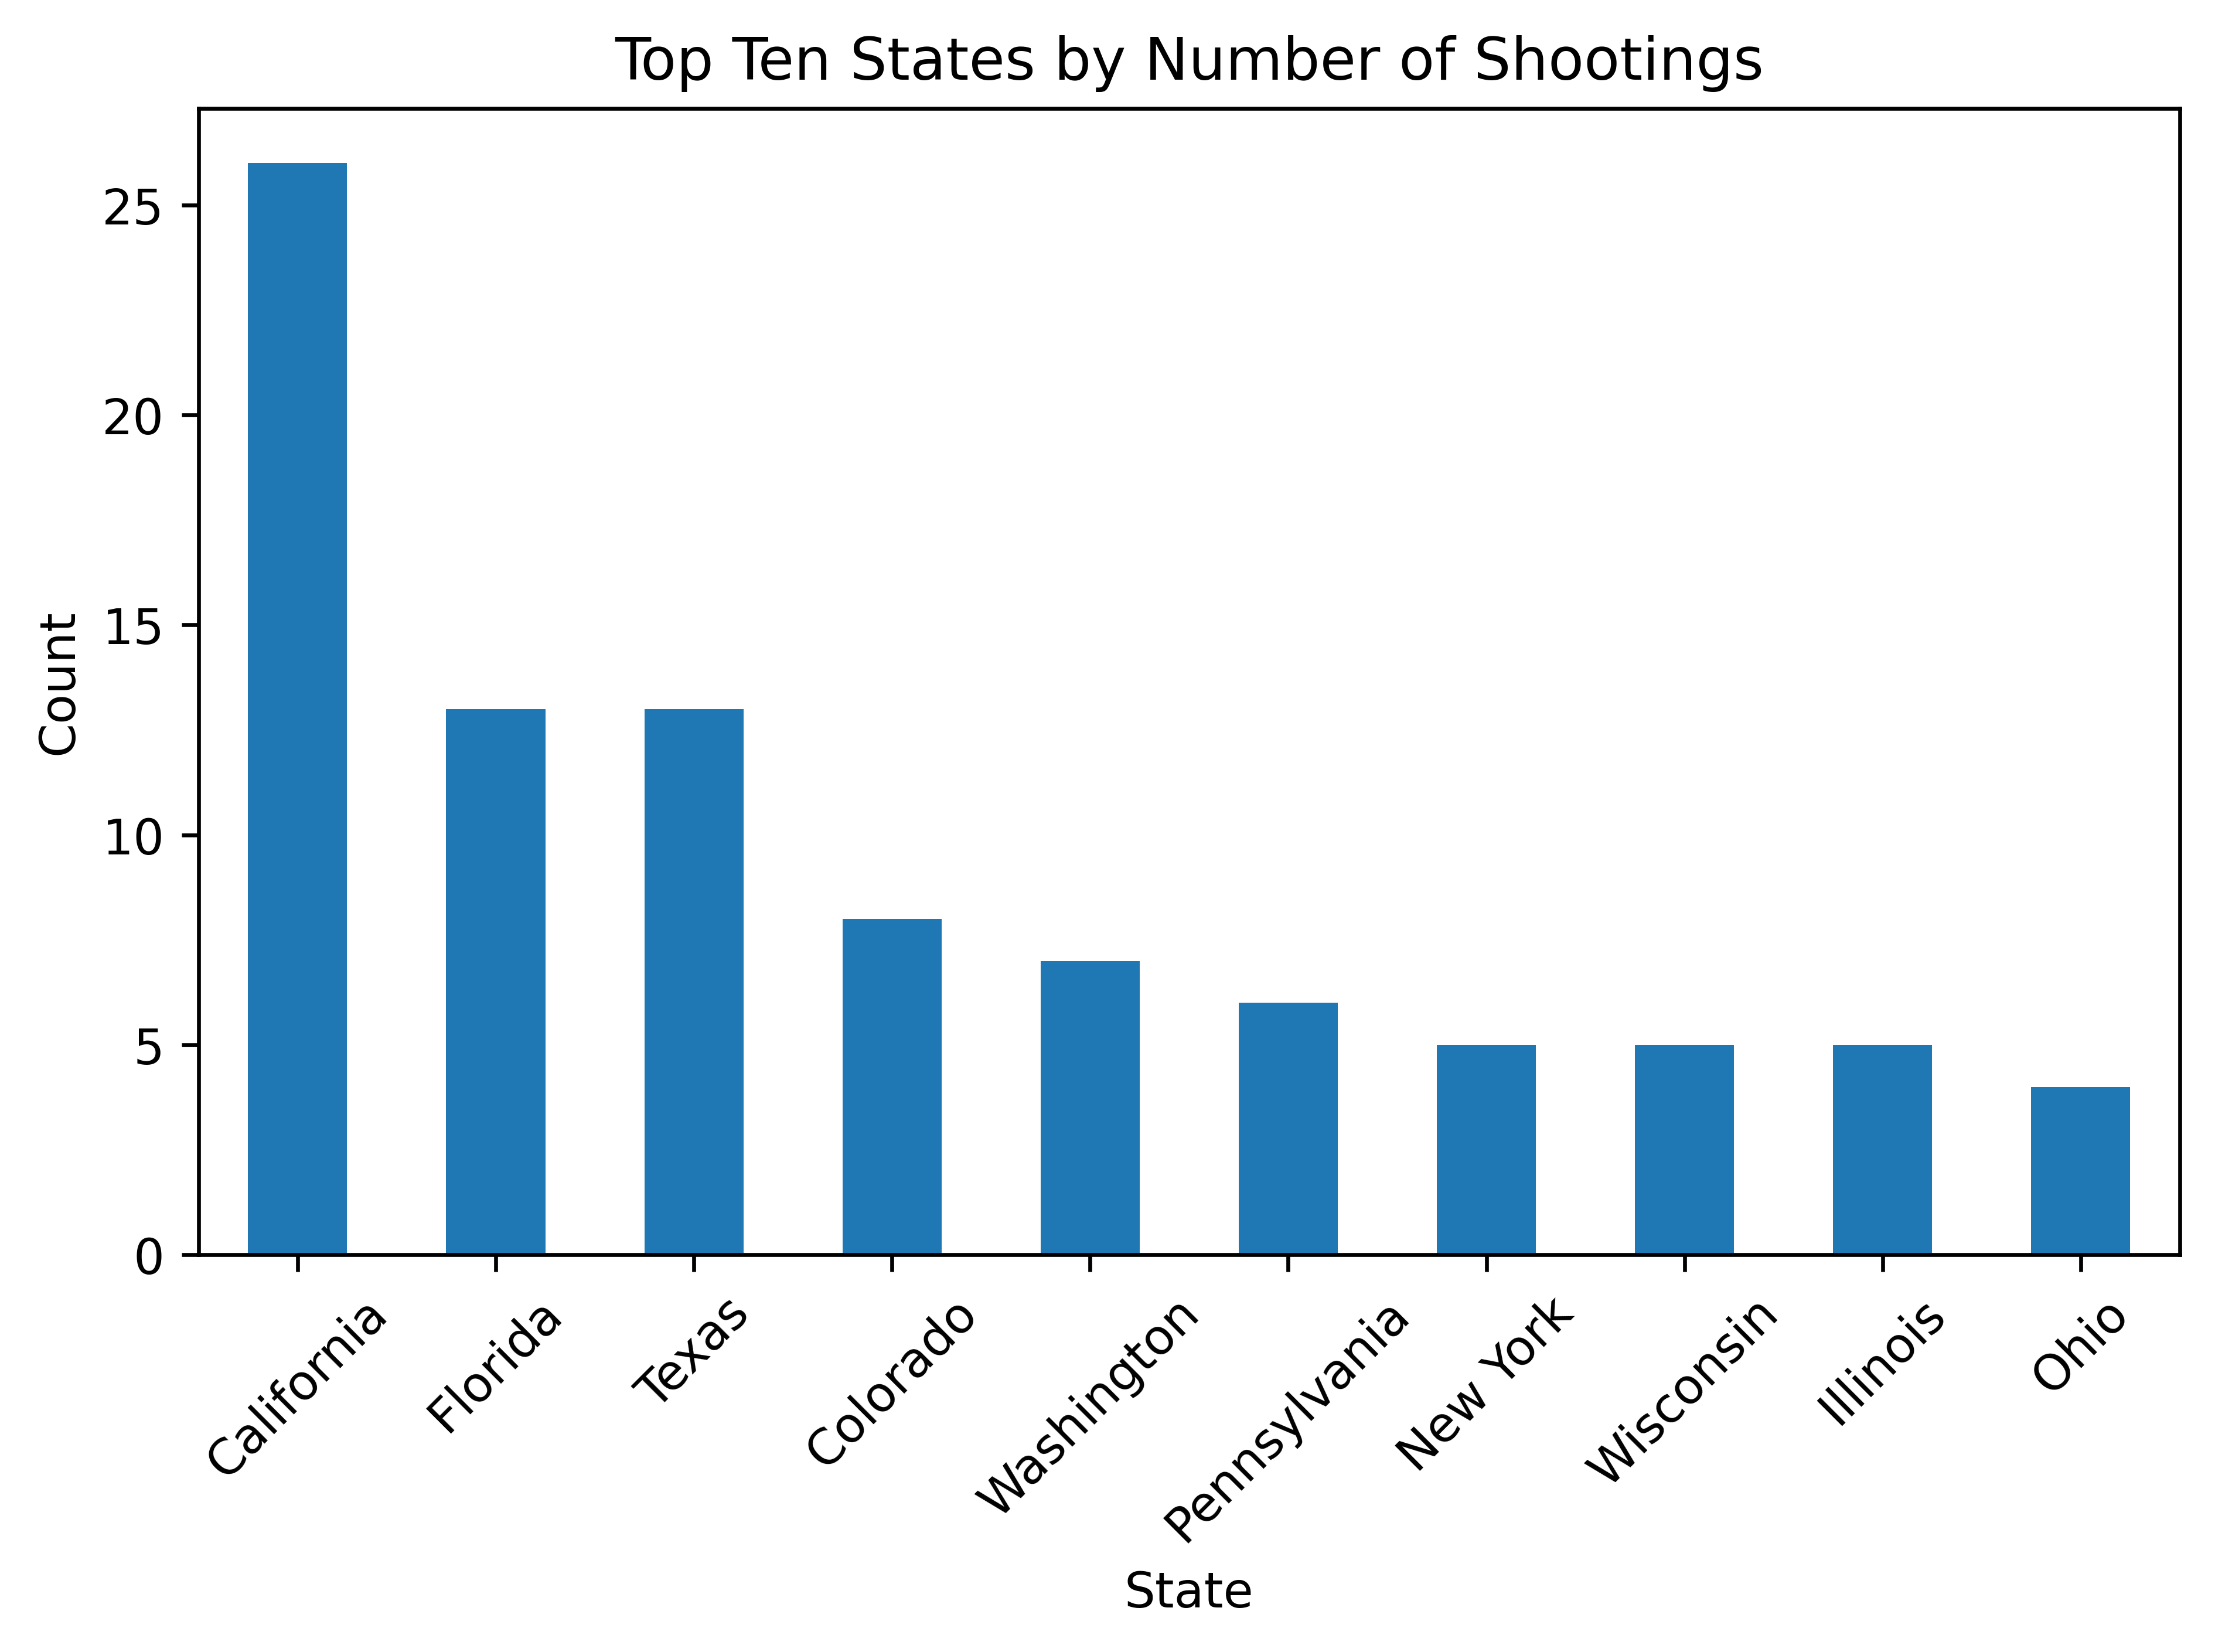

In [83]:
plt.figure(dpi=600)
mjms_df.state.value_counts().head(10).plot(kind='bar')
plt.title('Top Ten States by Number of Shootings')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

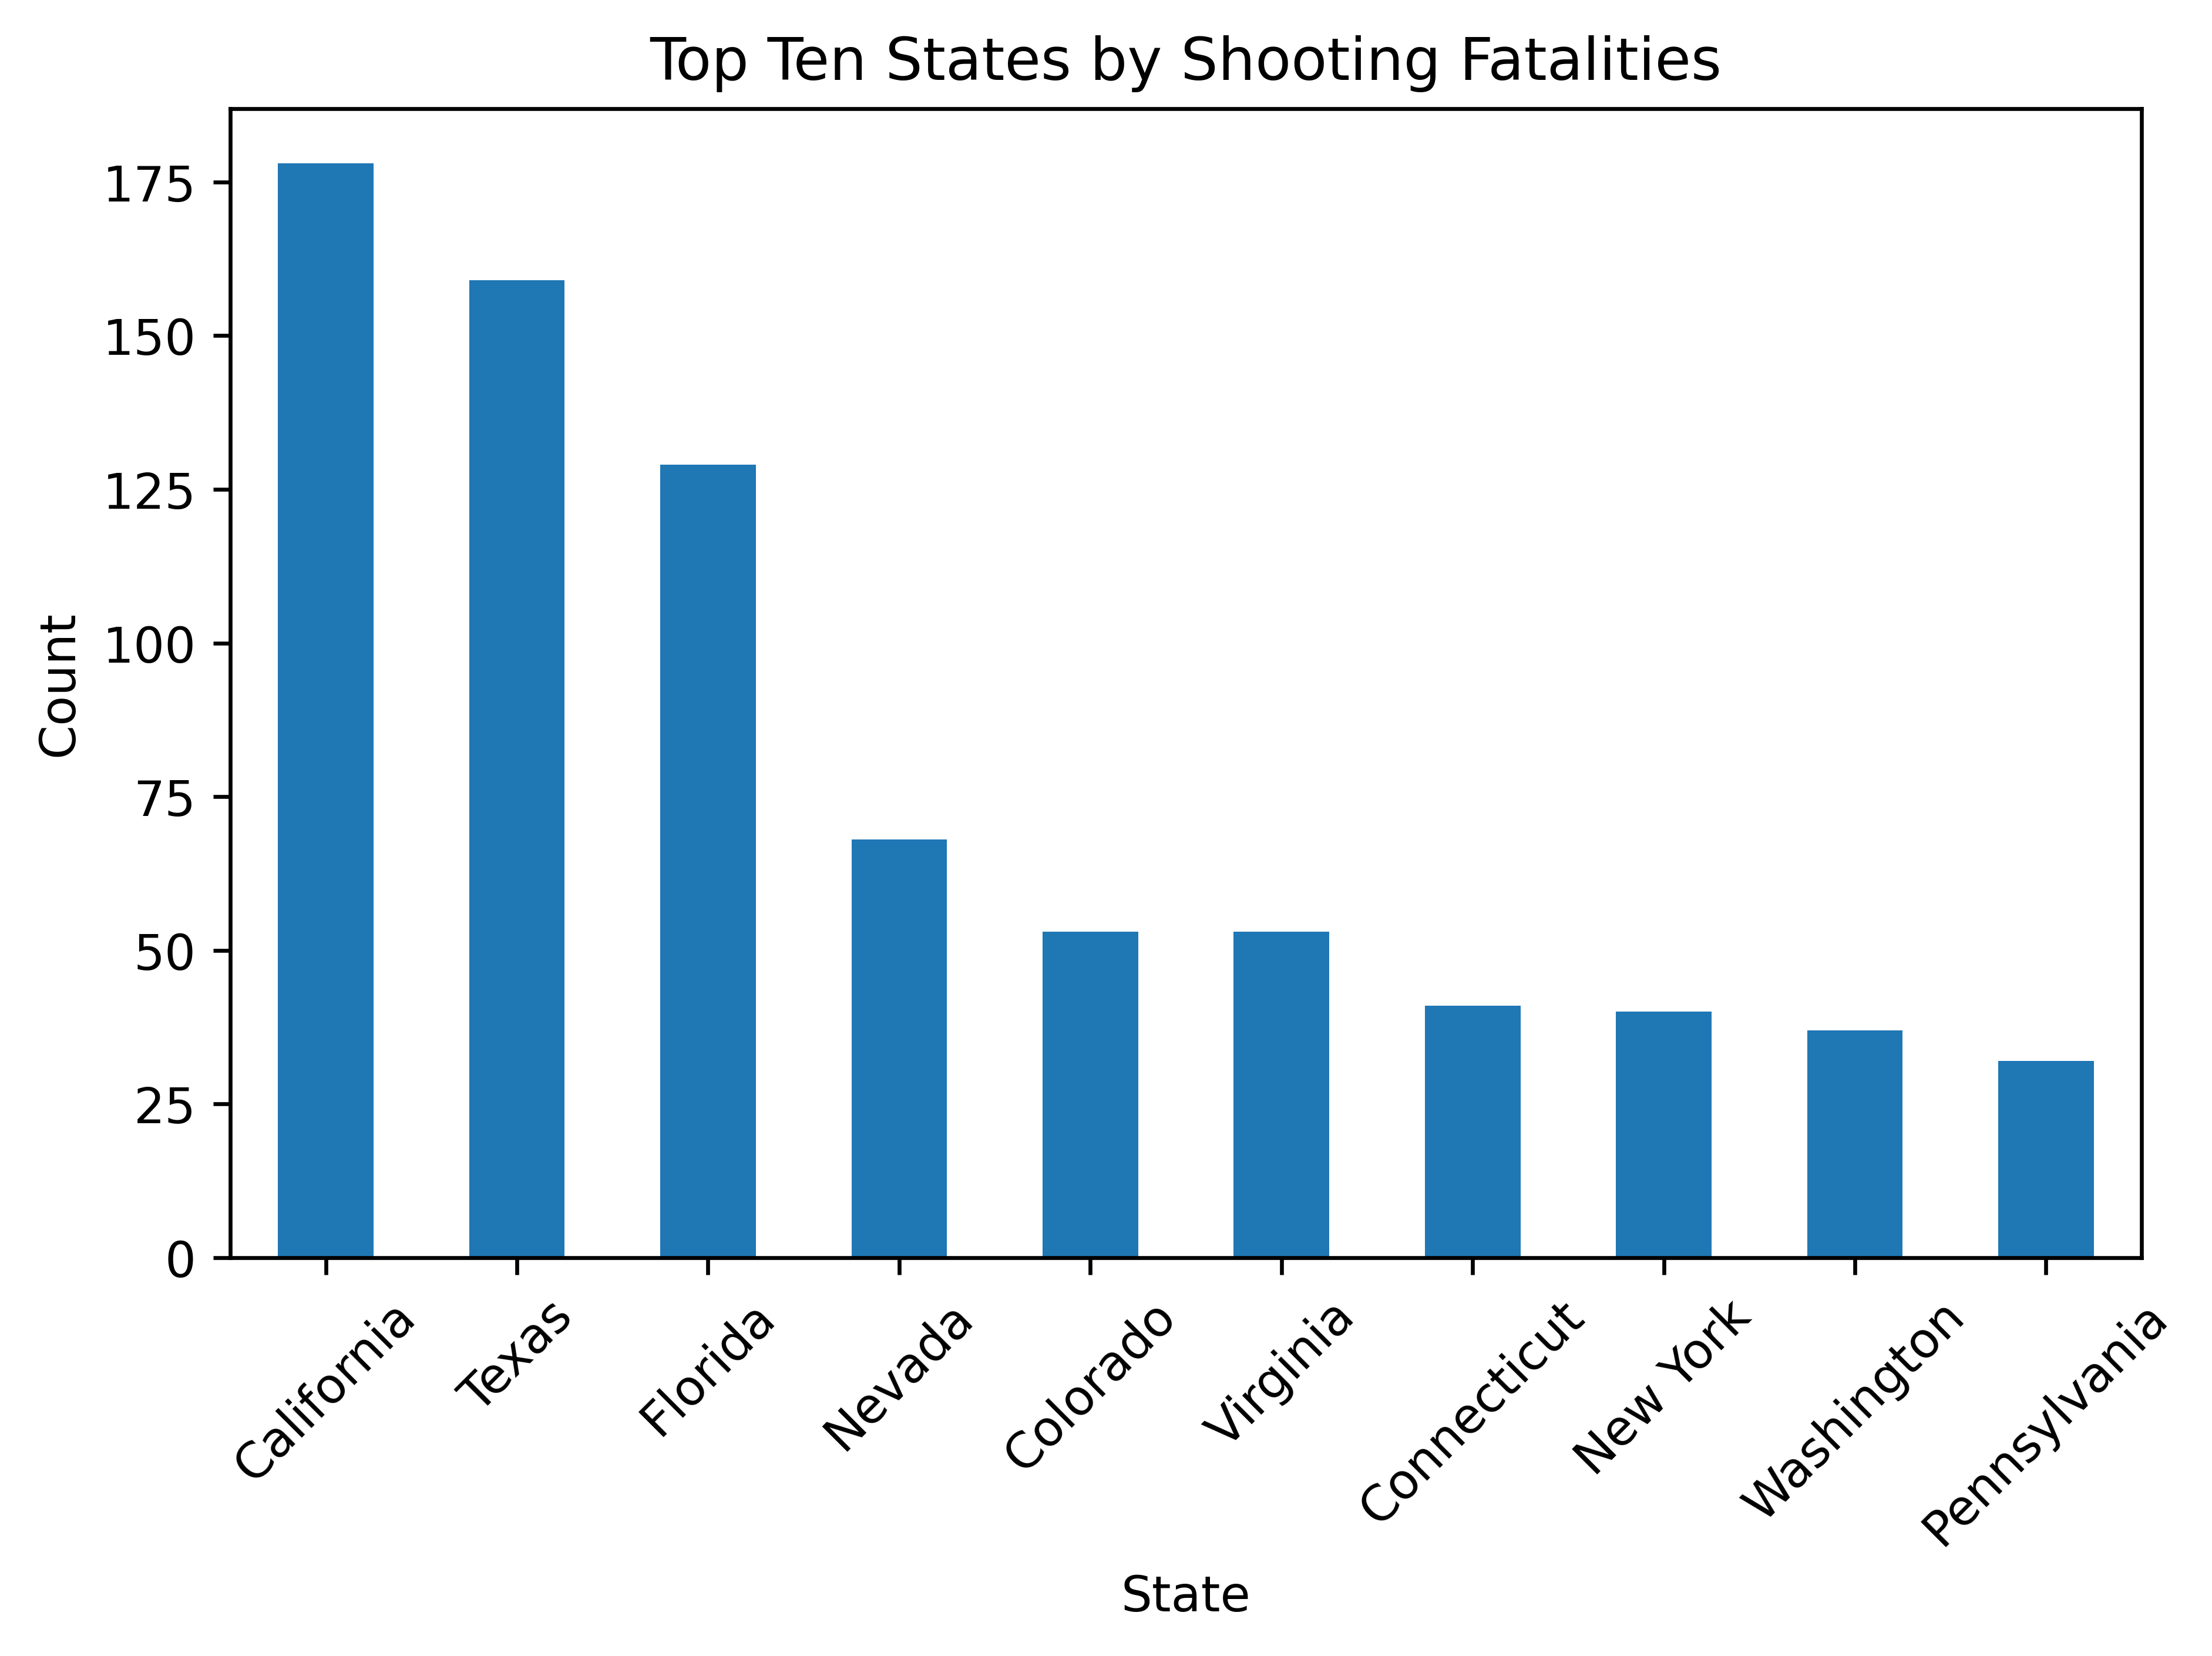

In [84]:
# Sorts Shootings by fatalities and returns the top 10 states by fatalities
plt.figure(dpi=600)
mjms_df.groupby('state')['fatalities'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Ten States by Shooting Fatalities')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()